#### EDA and Hypothesis Testing for Insurance Claims Data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

##### 1. Import and combine datasets

In [24]:
claims_data = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 3 - Insurance Claims Case Study\claims.csv")
claims_data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [25]:
cust_data = pd.read_csv(r"C:\Users\kavir\OneDrive\Documents\Business Analytics\python\case study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust_data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [26]:
cust_data.rename(columns = {'CUST_ID' : 'customer_id'}, inplace = True)
cust_data.head()

,customer_id,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [27]:
data = pd.merge(left = claims_data, right = cust_data, on = 'customer_id', how = 'inner')
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,Female,11-Mar-84,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,Female,11-Mar-84,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,Female,01-May-86,MA,413-187-7945,Silver


##### 2. Data audit for data types

In [28]:
data.dtypes

claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
dtype: object

In [29]:
data.claim_date = pd.to_datetime(data.claim_date, format = '%m/%d/%Y')

In [30]:
data.DateOfBirth = pd.to_datetime (data.DateOfBirth, format = '%d-%b-%y')

In [31]:
data.dtypes

claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
dtype: object

##### 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [33]:
data.claim_amount = data.claim_amount.str.replace('$','').astypepe('float')
data.head()

C:\Users\kavir\AppData\Local\Temp\ipykernel_12712\729627496.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data.claim_amount = data.claim_amount.str.replace('$','').astype('float')


,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver


##### 4.Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [35]:
data.claim_type.unique()

array(['Material only', 'Injury only', 'Material and injury'],
      dtype=object)

In [36]:
data.police_report.unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [37]:
data['alert_flag'] = (data.claim_type == 'Injury only') & (data.police_report == 'No')
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,False
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,False
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,Female,1984-03-11,TN,798-631-4758,Silver,False
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,False
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,False


In [46]:
data.alert_flag = data.alert_flag.astype(int)

In [55]:
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,NaN,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.0,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.5,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.0,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.0,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.0,1.0,No,Male,2065-01-28,UT,517-562-4916,Silver,1
999,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.0,1.0,No,Female,2066-06-19,HI,457-752-1374,Gold,0
72,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.0,1.0,Yes,Female,2063-11-18,NC,643-246-4718,Silver,0
936,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.0,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0


##### 5. One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records inthe data based on the customer ID column.

In [53]:
data.sort_values(by = ['customer_id','claim_date'], ascending = [True, False], inplace = True)

In [50]:
data.drop_duplicates(subset = 'customer_id', keep = 'last', inplace = True)

In [52]:
data

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,Female,1970-01-13,ME,265-543-1264,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,Female,1984-03-11,TN,798-631-4758,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,Female,1986-05-01,MA,413-187-7945,Silver,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,Male,1977-05-13,NV,956-871-8691,Gold,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,62020796,79539873,Other driver error,2018-09-06,Auto,Yes,Material only,1770.0,1.0,No,Female,1981-03-15,ND,459-425-4319,Platinum,0
1081,63269067,42364152,Other causes,2017-05-09,Home,No,Material only,2800.0,1.0,No,Female,1996-07-07,ID,529-462-1635,Silver,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,Male,1990-04-11,WI,712-651-9613,Gold,0
1083,12376894,11256802,Other driver error,2017-04-18,Auto,No,Material only,2840.0,4.0,No,Female,2064-10-22,LA,469-345-5617,Silver,0


##### 6.  Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [57]:
missing_val = data.isnull().sum()
missing_val

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
alert_flag              0
dtype: int64

In [61]:
for column in missing_val.index:
    if missing_val[column] > 0:
        if data[column].dtype == 'object':
            mode_val = data[column].mode().values[0]
            data[column].fillna(mode_val, inplace = True)
            
        else:
            mean_val = data[column].mean()
            data[column].fillna(mean_val, inplace = True)

In [65]:
data.isnull().sum()

claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
alert_flag             0
dtype: int64

##### 7.  Calculate the age of customers in years. Based on the age, categorize the customers according to the criteria.

In [66]:
current_dte = pd.to_datetime('today')
current_dte

Timestamp('2023-09-11 09:21:34.318769')

In [72]:
data['age'] = (current_dte - data['DateOfBirth']).dt.days//365

In [73]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,52
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1,43


In [76]:
age_categories = []

for age in data['age']:
    if age < 18:
        category = 'Children'
    elif 18 <= age < 30:
        category = 'Youth'
    elif 30 <= age < 60:
        category = 'Adult'
    else:
        category = 'Senior'
        
    age_categories.append(category)

In [77]:
# create a new column

data['age_category'] = age_categories
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35,Adult
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,52,Adult
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1,43,Adult


##### 8.  What is the average amount claimed by the customers from various segments?

In [81]:
pd.DataFrame(data.groupby('Segment')['claim_amount'].mean().round(2))

,claim_amount
Segment,
Gold,12846.39
Platinum,12371.64
Silver,12267.15


##### 9.  What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [90]:
from datetime import datetime, timedelta

In [92]:
requ_dte = datetime(2018,10,1) - timedelta(days = 20)

In [93]:
requ_dte

datetime.datetime(2018, 9, 11, 0, 0)

In [100]:
prior_claim = data.loc[data['claim_date'] < requ_dte]
prior_claim.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35,Adult
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,52,Adult
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1,43,Adult


In [101]:
total_claim = prior_claim.groupby('incident_cause')['claim_amount'].sum().round(2)
total_claim

incident_cause
Crime                  721937.45
Driver error          3315847.88
Natural causes        1312744.91
Other causes          3723147.30
Other driver error    3277533.37
Name: claim_amount, dtype: float64

In [102]:
data.groupby('incident_cause')['claim_amount'].sum().round(2) 
# without filtering dates

incident_cause
Crime                  756727.45
Driver error          3593933.83
Natural causes        1384830.90
Other causes          4222924.79
Other driver error    3518188.85
Name: claim_amount, dtype: float64

##### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [104]:
data['incident_cause'].unique()

array(['Driver error', 'Other causes', 'Natural causes',
       'Other driver error', 'Crime'], dtype=object)

In [108]:
adult_claim = data.loc[(data['State'].isin(['DE',"TX",'AK'])) & (data['incident_cause'].isin (['Driver error', 'Other driver error'])) & 
(data['age_category'] == 'Adult'), :]

In [110]:
no = len (adult_claim)

In [112]:
print (f"The no of adults who had driver related issues and who are from 'DE, AK, TX' states are {no}")

The no of adults who had driver related issues and who are from 'DE, AK, TX' states are 23


##### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [119]:
agg_val = data.groupby(['gender','Segment'])['claim_amount'].sum().round(2).reset_index()

In [120]:
agg_val

,gender,Segment,claim_amount
0,Female,Gold,2110042.41
1,Female,Platinum,2369720.43
2,Female,Silver,1897301.87
3,Male,Gold,2655966.87
4,Male,Platinum,2096443.42
5,Male,Silver,2347130.84


In [121]:
agg_val = agg_val.pivot(index = 'Segment', columns = 'gender', values = 'claim_amount')
agg_val

gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


In [125]:
total_claim = agg_val.values.sum()

In [126]:
claim_prcnt = (agg_val/total_claim * 100)

<Figure size 800x800 with 0 Axes>

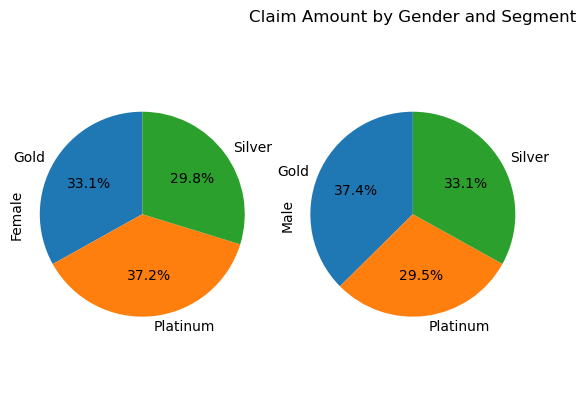

In [130]:
plt.figure(figsize=(8, 8))
claim_prcnt.plot.pie(subplots = True, autopct='%1.1f%%',startangle = 90, legend = False)
plt.title('Claim Amount by Gender and Segment')
plt.axis('equal')
plt.show()

##### 12.  Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [132]:
data.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35,Adult
828,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,0,52,Adult
509,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,1,43,Adult


In [134]:
driver_claim = data[data['incident_cause'].isin(['Driver error','Other driver error'])]

In [135]:
gender_claim = driver_claim.groupby('gender')['claim_amount'].sum()

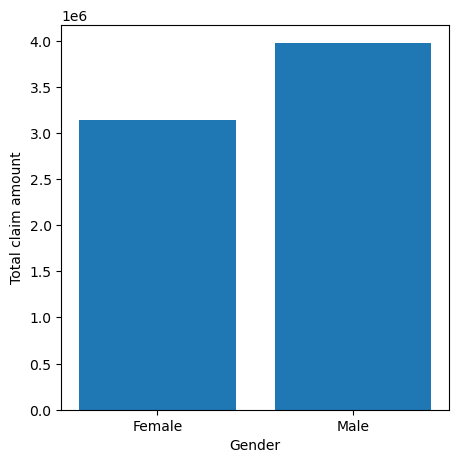

In [137]:
plt.figure(figsize = (5,5))
plt.bar (gender_claim.index, gender_claim.values)
plt.xlabel ('Gender')
plt.ylabel ('Total claim amount')
plt.show()

##### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [138]:
fraud_claims = data[data['fraudulent'] == 'Yes']

In [143]:
age_group = fraud_claims.groupby('age_category')['fraudulent'].count()

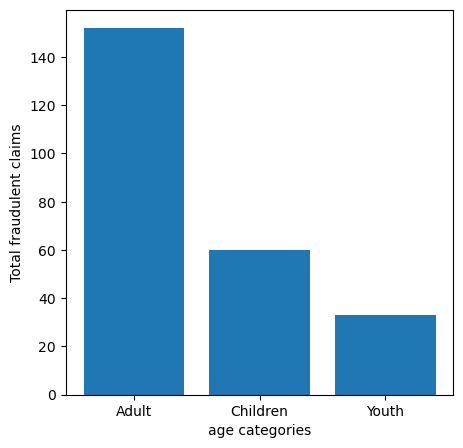

In [144]:
plt.figure(figsize = (5,5))
plt.bar (age_group.index, age_group.values)
plt.xlabel ('age categories')
plt.ylabel ('Total fraudulent claims')
plt.show()

##### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [147]:
data['month'] = data['claim_date'].dt.strftime('%B')

In [148]:
data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,month
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult,April
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult,April
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35,Adult,October


In [149]:
monthly_claim = data.groupby('month')['claim_amount'].sum()
monthly_claim.head()

month
April       1.293953e+06
August      9.112965e+05
December    6.942525e+05
February    1.164541e+06
January     1.327169e+06
Name: claim_amount, dtype: float64

In [156]:
chronological_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

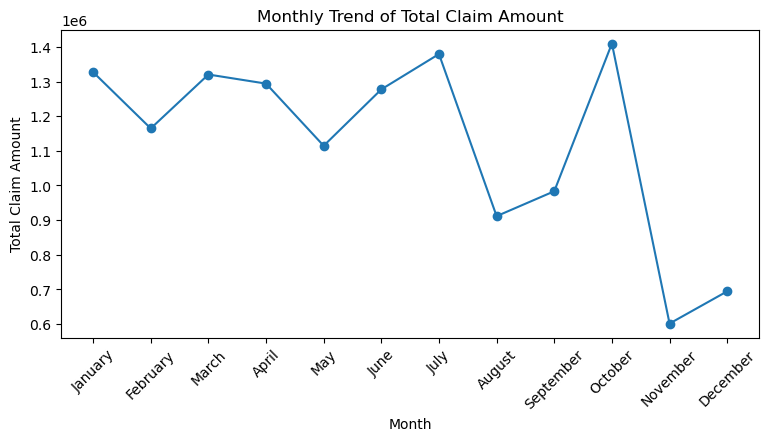

In [161]:
plt.figure(figsize=(9, 4))
plt.plot(monthly_claim.loc[chronological_order].index, monthly_claim.loc[chronological_order].values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.xticks(rotation=45)

##### 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [170]:
fraud = data[data['fraudulent'] == 'Yes']
non_fraud = data[data['fraudulent'] == 'No']


avg_fraud = fraud.groupby(['gender', 'age_category'])['claim_amount'].mean().reset_index()
avg_non_fraud = non_fraud.groupby(['gender', 'age_category'])['claim_amount'].mean().reset_index()

avg_fraud_age = fraud_claims.groupby(['age_category', 'gender'])['claim_amount'].mean().reset_index()
avg_non_fraud_age = non_fraud.groupby(['age_category', 'gender'])['claim_amount'].mean().reset_index()

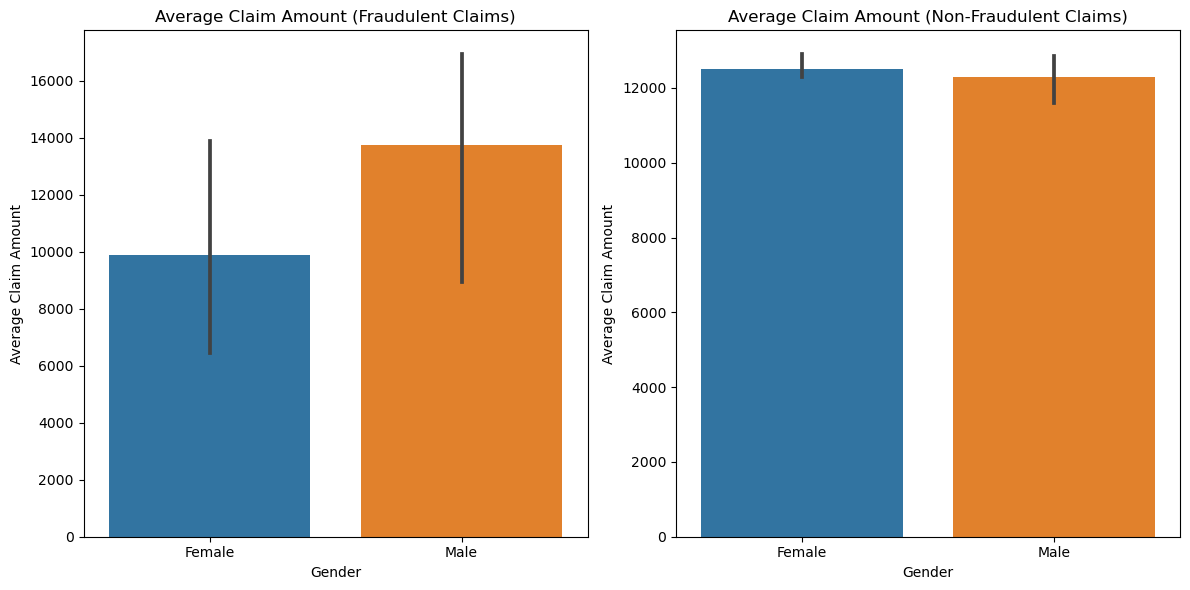

In [171]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='gender', y='claim_amount', data = avg_fraud)
plt.title('Average Claim Amount (Fraudulent Claims)')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')

plt.subplot(1, 2, 2)
sns.barplot(x='gender', y='claim_amount', data = avg_non_fraud)
plt.title('Average Claim Amount (Non-Fraudulent Claims)')
plt.xlabel('Gender')
plt.ylabel('Average Claim Amount')

plt.tight_layout()
plt.show()


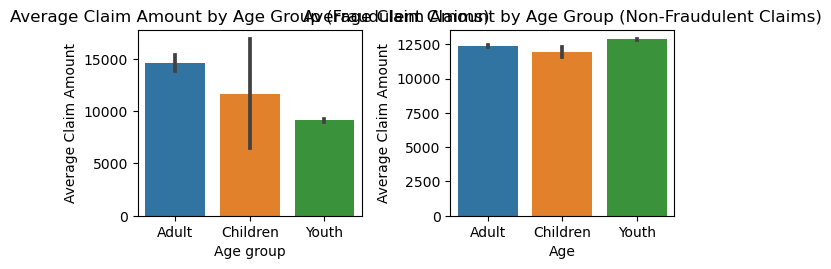

In [176]:
plt.subplot(2, 2, 3)
sns.barplot(x='age_category', y='claim_amount', data = avg_fraud_age)
plt.title('Average Claim Amount by Age Group (Fraudulent Claims)')
plt.xlabel('Age group')
plt.ylabel('Average Claim Amount')

plt.subplot(2, 2, 4)
sns.barplot(x='age_category', y='claim_amount', data = avg_non_fraud_age)
plt.title('Average Claim Amount by Age Group (Non-Fraudulent Claims)')
plt.xlabel('Age')
plt.ylabel('Average Claim Amount')

plt.tight_layout()
plt.show()

### Based on the conclusions from exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements. 

In [177]:
import scipy.stats as stats

### 16. Is there any similarity in the amount claimed by males and females?

##### i. Null Hypothesis, HO:
                    There is no similarity in the amount claimed by males and females

##### ii. Alternate Hypothesis, Ha:
                    There is a similarity in the amount claimed by males and females

##### iii. CI and p value:
                    CI = 95%
                    p value = 0.05

##### iv. Test:
                    t-test

In [178]:
data.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,month
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult,April
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult,April
677,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,35,Adult,October


In [180]:
male_claim = data.loc[data['gender']=='Male',['claim_amount']]
female_claim = data.loc[data['gender']=='Female', ['claim_amount']]

In [181]:
stats.ttest_ind(male_claim, female_claim)

Ttest_indResult(statistic=array([0.96305299]), pvalue=array([0.33573731]))

In [182]:
stats.f_oneway(male_claim, female_claim)

F_onewayResult(statistic=array([0.92747106]), pvalue=array([0.33573731]))

##### v. Accepting rule:
                        The new p value from the output > assumed p value (0.05)
                            hence, we will accept the Null Hypothesis.

##### vi. Business Conclusion:
                        There is no similarity between the amount claimed by males and females

### 17. Is there any relationship between age category and segment?

##### i. Null Hypothesis, HO:
                    There is no relationship between age category and segment

##### ii. Alternate Hypothesis, Ha:
                    There is a relationship between age category and segment

##### iii. CI and p value:
                    CI = 95%
                    p value = 0.05

##### iv. Test:
                    Chi-squared test

In [184]:
table = pd.crosstab(data['age_category'], data['Segment'])

In [185]:
stats.chi2_contingency(table)

Chi2ContingencyResult(statistic=0.8859630755112246, pvalue=0.9265659514166334, dof=4, expected_freq=array([[224.04545455, 218.00649351, 208.94805195],
       [ 84.31818182,  82.04545455,  78.63636364],
       [ 62.63636364,  60.94805195,  58.41558442]]))

##### v. Accepting rule:
                        The new p value from the output > assumed p value (0.05)
                            hence, we will accept the Null Hypothesis.

##### vi. Business Conclusion:
                        There is no relationship between age category and segment

### 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

##### i. Null Hypothesis, HO:
                    There is no significant rise in claim amounts as compared to 2016-17 fiscal average

##### ii. Alternate Hypothesis, Ha:
                    There is a significant rise in claim amounts as compared to 2016-17 fiscal average

##### iii. CI and p value:
                    CI = 95%
                    p value = 0.05

##### iv. Test:
                    t-test

In [188]:
current_year = data[data['claim_date'].dt.year == 2018]

In [194]:
current_year.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,alert_flag,age,age_category,month
188,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.489635,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,1,45,Adult,April
836,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult,April


In [198]:
stats.ttest_1samp(current_year['claim_amount'], 10000)

TtestResult(statistic=4.50844168945753, pvalue=8.205144389110233e-06, df=483)

##### v. Accepting / Rejecting rule:
                        The new p value from the output < assumed p value (0.05)
                            hence, we will reject the Null Hypothesis.

##### vi. Business Conclusion:
                        There is a significant rise in claim amounts as compared to 2016-17 fiscal average

### 19. Is there any difference between age groups and insurance claims?

##### i. Null Hypothesis, HO:
                    There is no difference between age groups and insurance claims

##### ii. Alternate Hypothesis, Ha:
                    There is a difference between age groups and insurance claims

##### iii. CI and p value:
                    CI = 95%
                    p value = 0.05

##### iv. Test:
                    F-test | ANOVA

In [199]:
data['age_category'].value_counts()

Adult       651
Children    245
Youth       182
Name: age_category, dtype: int64

In [202]:
cat1 = data.loc[data['age_category'] == 'Adult', ['claim_amount']]
cat2 = data.loc[data['age_category'] == 'Children', ['claim_amount']]
cat3 = data.loc[data['age_category'] == 'Youth', ['claim_amount']]

In [203]:
print("Mean among diff categories")
print("cat1= ", cat1.mean())
print("cat2= ", cat2.mean())
print("cat3= ", cat3.mean())

Mean among diff categories
cat1=  claim_amount    12903.728226
dtype: float64
cat2=  claim_amount    11660.921941
dtype: float64
cat3=  claim_amount    12194.246569
dtype: float64


In [204]:
stats.f_oneway(cat1, cat2, cat3)

F_onewayResult(statistic=array([0.82748368]), pvalue=array([0.43742616]))

##### v. Accepting / Rejecting rule:
                        The new p value from the output > assumed p value (0.05)
                            hence, we will accept the Null Hypothesis.

##### vi. Business Conclusion:
                        There is no statistically significant  difference between age groups and insurance claims

### 20. Is there any relationship between total number of policy claims and the claimed amount?

##### i. Null Hypothesis, HO:
                    There is no relationship between total number of policy claims and the claimed amount

##### ii. Alternate Hypothesis, Ha:
                    There is a relationship between total number of policy claims and the claimed amount

##### iii. CI and p value:
                    CI = 95%
                    p value = 0.05

##### iv. Test:
                   pearson co-efficient

In [205]:
stats.pearsonr(data['total_policy_claims'], data['claim_amount'])

PearsonRResult(statistic=-0.02190056138146501, pvalue=0.47256549705179146)

##### v. Accepting / Rejecting rule:
                        The new p value from the output > assumed p value (0.05)
                            hence, we will accept the Null Hypothesis.

##### vi. Business Conclusion:
             There is no statistically significant relationship between total number of policy claims and the claimed amount